# Feature Selection using forward selection from scratch on IRIS dataset

In [1]:
# importing the dataset
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from itertools import combinations
import numpy as np

In [2]:
# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

In [3]:
# Define the forward selection function
def forward_selection(X, y):
    # Start with no features in the model
    features = []
    # All possible feature indices
    remaining_features = list(range(X.shape[1]))
    # Initial score to compare against
    current_score, best_new_score = 0.0, 0.0
    # Loop while there are features that can be added and they improve the score
    while remaining_features and current_score == best_new_score:
        scores_with_candidates = []
        # Test adding each remaining feature
        for candidate in remaining_features:
            # Use logistic regression for the current subset of features
            model = LogisticRegression(solver='liblinear', multi_class='ovr')
            # Fit the model with the existing features plus the new candidate
            model.fit(X[:, features + [candidate]], y)
            # Predict the target using the fitted model
            predictions = model.predict(X[:, features + [candidate]])
            # Calculate the accuracy of the model
            accuracy = accuracy_score(y, predictions)
            # Store the accuracy with the corresponding feature index
            scores_with_candidates.append((accuracy, candidate))
        
        # Sort the features by descending accuracy
        scores_with_candidates.sort()
        # Select the feature which gives the highest accuracy
        best_new_score, best_candidate = scores_with_candidates.pop()
        # If this feature improves the model, add it to the subset of features
        if current_score < best_new_score:
            features.append(best_candidate)
            remaining_features.remove(best_candidate)
            # Update the current score to the new score
            current_score = best_new_score

    # Return the list of selected features
    return features

In [4]:
# Apply the forward selection to the dataset
selected_features = forward_selection(X, y)
selected_features

[3, 1, 2, 0]

# Principal Component Analysis from Scratch on IRIS Dataset

In [5]:
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data
feature_names = data.feature_names

# Standardize the data to have a mean of zero (mean centering)
X_meaned = X - np.mean(X, axis=0)

# Calculate the covariance matrix
cov_mat = np.cov(X_meaned, rowvar=False)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

# Sort the eigenvalues and eigenvectors in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

# Select the first n eigenvectors, n is desired dimension
# of our final reduced data. For the sake of example, let's choose 2 dimensions.
n_components = 2
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

# Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

# Print the feature names
selected_features = [feature_names[i] for i in range(n_components)]
selected_features


['sepal length (cm)', 'sepal width (cm)']

# Linear Discriminant Analysis from Scratch on IRIS Dataset

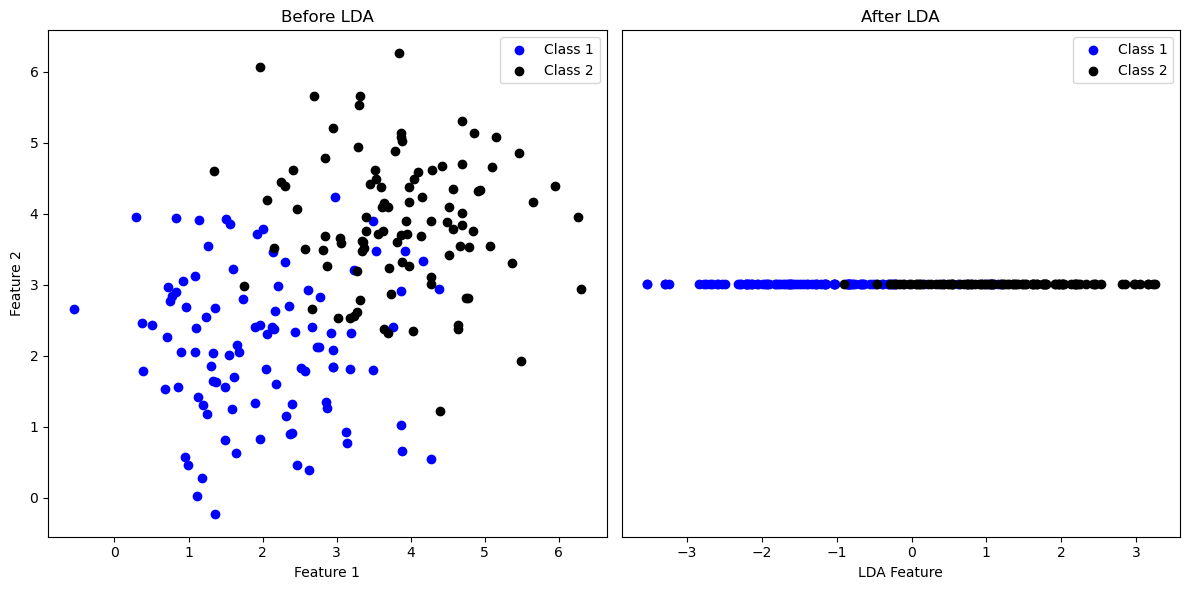

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Generating random data: 100 points for two classes
np.random.seed(0)
class_1 = np.random.randn(100, 2) + [2, 2]
class_2 = np.random.randn(100, 2) + [4, 4]

# Combining the data into one array
X = np.vstack((class_1, class_2))
y = np.array([0] * 100 + [1] * 100)  # Labels for the classes

# Plotting the data before LDA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], color='black', label='Class 2')
plt.title('Before LDA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Performing LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Plotting the data after LDA
# Since LDA gives us a 1D projection, we plot all points on a line y=0
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:100], [0] * 100, color='blue', label='Class 1')
plt.scatter(X_lda[100:], [0] * 100, color='black', label='Class 2')
plt.title('After LDA')
plt.xlabel('LDA Feature')
plt.yticks([])
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
from sklearn.datasets import load_iris
import numpy as np

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target
class_labels = np.unique(y)

# Calculate the overall mean of the data
mean_overall = np.mean(X, axis=0)

# Initialize within-class and between-class scatter matrices
S_W = np.zeros((X.shape[1], X.shape[1]))
S_B = np.zeros((X.shape[1], X.shape[1]))

# Calculate within-class scatter matrix
for c in class_labels:
    X_c = X[y == c]
    mean_c = np.mean(X_c, axis=0)
    S_W += np.dot((X_c - mean_c).T, (X_c - mean_c))

# Calculate between-class scatter matrix
for c in class_labels:
    N_c = X[y == c].shape[0]
    mean_c = np.mean(X[y == c], axis=0).reshape(-1, 1)  # column vector
    mean_overall = mean_overall.reshape(-1, 1)  # column vector
    S_B += N_c * np.dot((mean_c - mean_overall), (mean_c - mean_overall).T)

# Solve the generalized eigenvalue problem for the matrix S_W^-1 S_B
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigen_vals)[::-1]
sorted_eigen_vals = eigen_vals[sorted_indices]
sorted_eigen_vecs = eigen_vecs[:, sorted_indices]

# Select the top 2 eigenvectors
W = sorted_eigen_vecs[:, :2]

# Transform the data
X_lda = X.dot(W)

# Let's print the coefficients for each LDA component
for i in range(2):  # We have two LDA components
    print(f"LDA Component {i+1}:")
    for feature, coef in zip(feature_names, sorted_eigen_vecs[:, i]):
        print(f"{feature}: {coef:.3f}")
    print("\n")

LDA Component 1:
sepal length (cm): 0.209
sepal width (cm): 0.386
petal length (cm): -0.554
petal width (cm): -0.707


LDA Component 2:
sepal length (cm): -0.007
sepal width (cm): -0.587
petal length (cm): 0.253
petal width (cm): -0.769




In [8]:
# Let's print the coefficients for each LDA component
for i in range(2):  # We have two LDA components
    print(f"LDA Component {i+1}:")
    for feature, coef in zip(feature_names, sorted_eigen_vecs[:, i]):
        print(f"{feature}: {coef:.3f}")
    print("\n")

LDA Component 1:
sepal length (cm): 0.209
sepal width (cm): 0.386
petal length (cm): -0.554
petal width (cm): -0.707


LDA Component 2:
sepal length (cm): -0.007
sepal width (cm): -0.587
petal length (cm): 0.253
petal width (cm): -0.769


